# Specifications of Cellphone VS SAR

In [330]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
import scipy as sp
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
import math
from sklearn import linear_model

In [285]:
df = pd.read_csv("C:\\Users\\gaura\\Desktop\\Project.csv")

In [331]:

df.head()

,Name,Body_SAR,Head_SAR,2G,3G,4G,BT,WiFi,GPS,No. of Core,OP,BC,IS(MB),RAM(MB),No.Sensors,Size,Wtg(g)
0,samsung-galaxy-s10-plus,1.0400,0.4100,1,1,1,7,1,1,8.0000,19,4100,1000000,12000,8,6.4000,175
1,samsung-galaxy-s10e,0.9200,0.3600,1,1,1,7,1,1,8.0000,19,3100,256000,8000,6,5.8000,150
2,samsung-galaxy-s10,1.3700,0.3900,1,1,1,7,1,1,8.0000,19,3400,512000,8000,8,6.1000,157
3,google-pixel-3-xl,1.1900,1.3500,1,1,1,7,1,1,8.0000,19,3430,128000,4000,6,6.3000,184
4,google-pixel-3,1.3400,1.3400,1,1,1,7,1,1,8.0000,19,2915,128000,4000,6,5.5000,148


In [332]:
enc = LabelEncoder()

df.iloc[:,6] = enc.fit_transform(df.iloc[:,6])

In [333]:
df['OP'] = enc.fit_transform(df['OP'].astype(str))
df['Head_SAR'].astype(float)

0     0.4100
1     0.3600
2     0.3900
3     1.3500
4     1.3400
5     0.9000
6     1.1640
7     1.1930
8     0.2700
9     0.3600
10    0.3500
11    0.2600
12    1.0800
13    1.1400
14    1.0900
15    0.2800
16    0.2600
17    0.9200
18    0.3400
19    0.4100
20    0.3800
21    1.0900
22    1.1000
23    1.4900
24    0.7900
25    1.2500
26    0.8000
27    0.3900
28    0.9200
29    1.4000
       ...  
169   0.7000
170   0.4100
171   0.6200
172   0.3300
173   0.5700
174   0.4700
175   1.1900
176   1.0300
177   0.9900
178   0.9200
179   1.0200
180   0.4200
181   0.6300
182   0.3500
183   0.8900
184   0.3500
185   1.1700
186   1.0800
187   1.1100
188   1.1800
189   1.2000
190   1.2800
191   0.7000
192   1.1600
193   0.9900
194   0.7900
195   1.0000
196   0.9900
197   1.3100
198   0.5800
Name: Head_SAR, Length: 199, dtype: float64

In [334]:
df.head()

,Name,Body_SAR,Head_SAR,2G,3G,4G,BT,WiFi,GPS,No. of Core,OP,BC,IS(MB),RAM(MB),No.Sensors,Size,Wtg(g)
0,samsung-galaxy-s10-plus,1.0400,0.4100,1,1,1,7,1,1,8.0000,11,4100,1000000,12000,8,6.4000,175
1,samsung-galaxy-s10e,0.9200,0.3600,1,1,1,7,1,1,8.0000,11,3100,256000,8000,6,5.8000,150
2,samsung-galaxy-s10,1.3700,0.3900,1,1,1,7,1,1,8.0000,11,3400,512000,8000,8,6.1000,157
3,google-pixel-3-xl,1.1900,1.3500,1,1,1,7,1,1,8.0000,11,3430,128000,4000,6,6.3000,184
4,google-pixel-3,1.3400,1.3400,1,1,1,7,1,1,8.0000,11,2915,128000,4000,6,5.5000,148


In [335]:
df.describe()
df=df.fillna(df.mean())

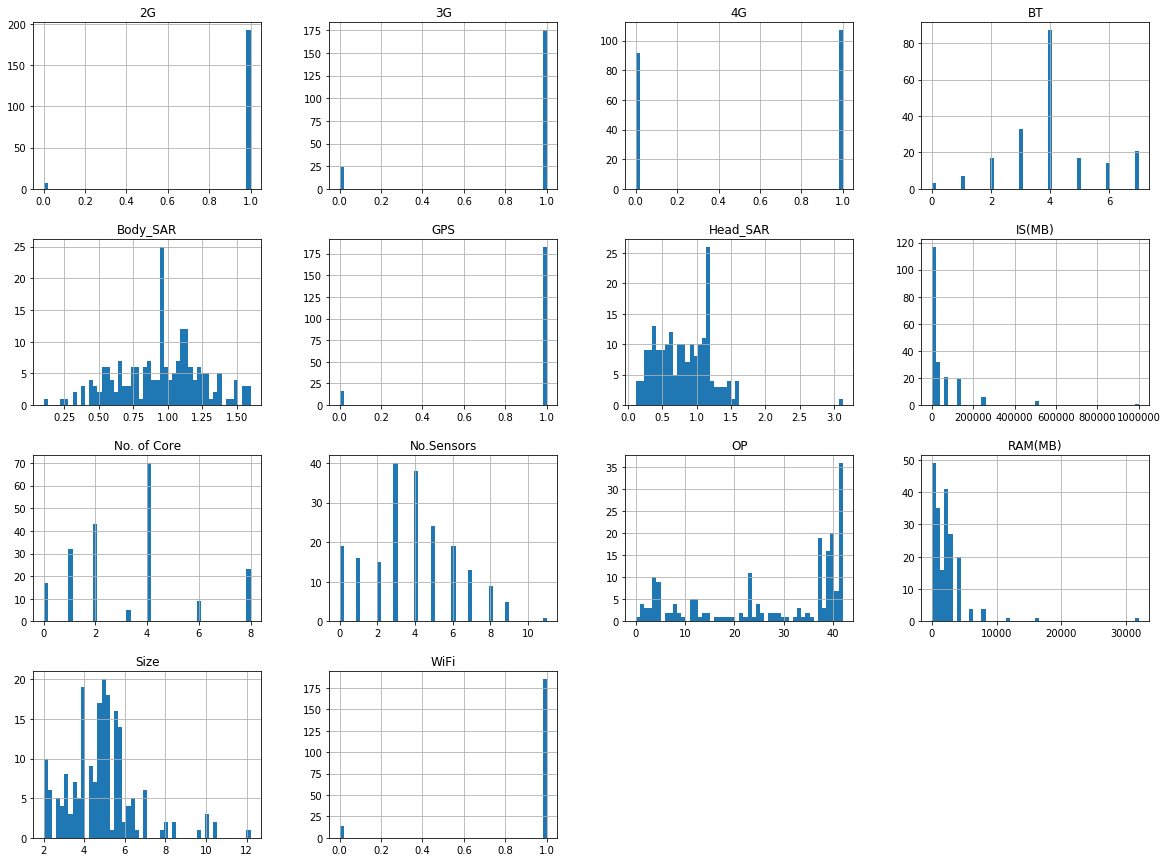

In [336]:
df.hist(bins=50, figsize=(20,15))
plt.savefig("attribute_histogram_plots")
plt.show()

In [337]:
#Feature importance
corr_matrix = df.corr()
corr_matrix["Body_SAR"].sort_values(ascending=False)

Body_SAR       1.0000
Head_SAR       0.3056
GPS            0.2147
Size           0.1983
3G             0.1749
OP             0.1620
BT             0.1355
No.Sensors     0.1352
4G             0.1228
WiFi           0.1199
IS(MB)         0.1192
No. of Core    0.1011
RAM(MB)       -0.0015
2G            -0.0161
Name: Body_SAR, dtype: float64

In [338]:
corr_matrix["Head_SAR"].sort_values(ascending=False)


Head_SAR       1.0000
Body_SAR       0.3056
OP             0.1461
Size           0.0226
IS(MB)        -0.0330
WiFi          -0.0549
3G            -0.0730
4G            -0.0815
GPS           -0.0828
BT            -0.0975
No. of Core   -0.1048
RAM(MB)       -0.1285
2G            -0.2398
No.Sensors    -0.2581
Name: Head_SAR, dtype: float64

In [339]:
X= df.iloc[:,[1,3,4,5,6,7,9,12,14,15]]
X=X.fillna(X.mean())
X

,Body_SAR,2G,3G,4G,BT,WiFi,No. of Core,IS(MB),No.Sensors,Size
0,1.0400,1,1,1,7,1,8.0000,1000000,8,6.4000
1,0.9200,1,1,1,7,1,8.0000,256000,6,5.8000
2,1.3700,1,1,1,7,1,8.0000,512000,8,6.1000
3,1.1900,1,1,1,7,1,8.0000,128000,6,6.3000
4,1.3400,1,1,1,7,1,8.0000,128000,6,5.5000
5,1.1000,1,1,1,7,1,6.0000,128000,6,6.1000
6,1.1710,1,1,1,7,1,6.0000,512000,6,6.5000
7,1.1820,1,1,1,7,1,6.0000,512000,6,5.8000
8,0.7600,1,1,1,7,1,8.0000,128000,9,6.4000
9,0.7900,1,1,1,7,1,8.0000,64000,8,6.2000


In [340]:
y= df.iloc[:,2]
y=y.fillna(y.mean())
y

0     0.4100
1     0.3600
2     0.3900
3     1.3500
4     1.3400
5     0.9000
6     1.1640
7     1.1930
8     0.2700
9     0.3600
10    0.3500
11    0.2600
12    1.0800
13    1.1400
14    1.0900
15    0.2800
16    0.2600
17    0.9200
18    0.3400
19    0.4100
20    0.3800
21    1.0900
22    1.1000
23    1.4900
24    0.7900
25    1.2500
26    0.8000
27    0.3900
28    0.9200
29    1.4000
       ...  
169   0.7000
170   0.4100
171   0.6200
172   0.3300
173   0.5700
174   0.4700
175   1.1900
176   1.0300
177   0.9900
178   0.9200
179   1.0200
180   0.4200
181   0.6300
182   0.3500
183   0.8900
184   0.3500
185   1.1700
186   1.0800
187   1.1100
188   1.1800
189   1.2000
190   1.2800
191   0.7000
192   1.1600
193   0.9900
194   0.7900
195   1.0000
196   0.9900
197   1.3100
198   0.5800
Name: Head_SAR, Length: 199, dtype: float64

In [341]:
from pandas import DataFrame
from sklearn import linear_model
import statsmodels.api as sm

 # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets

X= X.astype(float)
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)





# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 1.2000182422298415
Coefficients: 
 [ 4.32393923e-01 -6.61452050e-01  1.79260997e-01  6.74613653e-02
  2.56503725e-02 -7.08605949e-02 -1.11970834e-02  2.15688930e-07
 -6.44046543e-02 -2.22939505e-02]
                            OLS Regression Results                            
Dep. Variable:               Head_SAR   R-squared:                       0.247
Model:                            OLS   Adj. R-squared:                  0.207
Method:                 Least Squares   F-statistic:                     6.183
Date:                Thu, 04 Jul 2019   Prob (F-statistic):           3.81e-08
Time:                        15:19:48   Log-Likelihood:                -71.822
No. Observations:                 199   AIC:                             165.6
Df Residuals:                     188   BIC:                             201.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                        

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [342]:
model.rsquared

0.2474897523785171

In [343]:
X

,const,Body_SAR,2G,3G,4G,BT,WiFi,No. of Core,IS(MB),No.Sensors,Size
0,1.0000,1.0400,1.0000,1.0000,1.0000,7.0000,1.0000,8.0000,"1,000,000.0000",8.0000,6.4000
1,1.0000,0.9200,1.0000,1.0000,1.0000,7.0000,1.0000,8.0000,"256,000.0000",6.0000,5.8000
2,1.0000,1.3700,1.0000,1.0000,1.0000,7.0000,1.0000,8.0000,"512,000.0000",8.0000,6.1000
3,1.0000,1.1900,1.0000,1.0000,1.0000,7.0000,1.0000,8.0000,"128,000.0000",6.0000,6.3000
4,1.0000,1.3400,1.0000,1.0000,1.0000,7.0000,1.0000,8.0000,"128,000.0000",6.0000,5.5000
5,1.0000,1.1000,1.0000,1.0000,1.0000,7.0000,1.0000,6.0000,"128,000.0000",6.0000,6.1000
6,1.0000,1.1710,1.0000,1.0000,1.0000,7.0000,1.0000,6.0000,"512,000.0000",6.0000,6.5000
7,1.0000,1.1820,1.0000,1.0000,1.0000,7.0000,1.0000,6.0000,"512,000.0000",6.0000,5.8000
8,1.0000,0.7600,1.0000,1.0000,1.0000,7.0000,1.0000,8.0000,"128,000.0000",9.0000,6.4000
9,1.0000,0.7900,1.0000,1.0000,1.0000,7.0000,1.0000,8.0000,"64,000.0000",8.0000,6.2000


In [344]:
 np.asarray(X)

array([[1.00e+00, 1.04e+00, 1.00e+00, ..., 1.00e+06, 8.00e+00, 6.40e+00],
       [1.00e+00, 9.20e-01, 1.00e+00, ..., 2.56e+05, 6.00e+00, 5.80e+00],
       [1.00e+00, 1.37e+00, 1.00e+00, ..., 5.12e+05, 8.00e+00, 6.10e+00],
       ...,
       [1.00e+00, 1.20e+00, 1.00e+00, ..., 1.50e+01, 0.00e+00, 2.20e+00],
       [1.00e+00, 1.13e+00, 1.00e+00, ..., 1.60e+04, 2.00e+00, 3.20e+00],
       [1.00e+00, 6.00e-01, 1.00e+00, ..., 5.12e+02, 3.00e+00, 3.10e+00]])

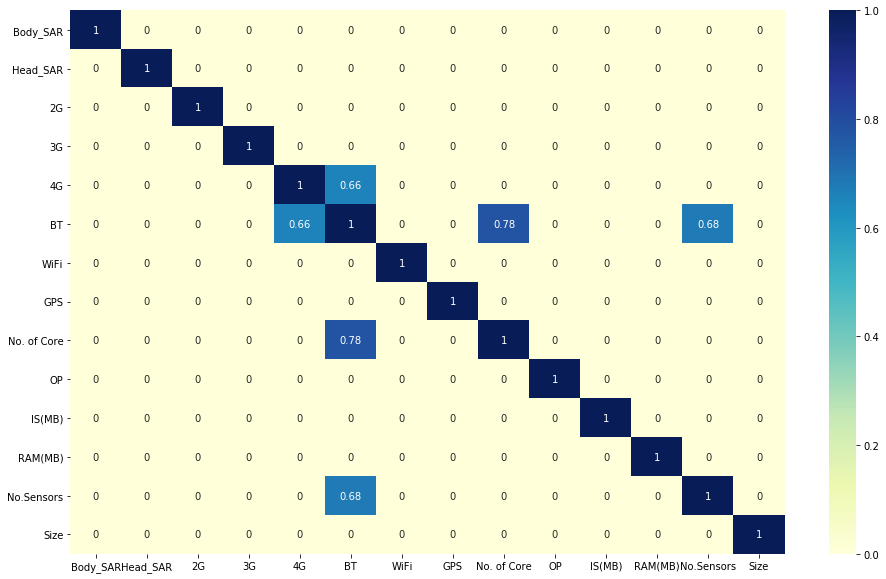

In [345]:
import seaborn as sns
pd.options.display.float_format = '{:,.4f}'.format
corr = df.corr()
corr[np.abs(corr) < 0.65] = 0
plt.figure(figsize=(16,10))
sns.heatmap(corr, annot=True, cmap='YlGnBu')
plt.show()

In [346]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm


# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(159, 11) (159,)
(40, 11) (40,)


In [347]:
from sklearn import ensemble
clf = ensemble.GradientBoostingRegressor(n_estimators = 50, max_depth = 2, min_samples_split = 2,
          learning_rate = 0.1, loss = 'ls')

In [348]:
clf.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=2, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=50, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [349]:
clf.score(X_test,y_test)

0.20493746143547742

In [350]:
lasso = linear_model.Lasso(alpha=10, max_iter=10)
lasso.fit(X_train, y_train)
lasso = linear_model.Lasso()
lasso.fit(X_train, y_train)
lasso.score(X_test, y_test)

-0.01259414920347579

In [351]:

ridge = linear_model.Ridge()
ridge.fit(X_train, y_train)
ridge.score(X_test, y_test)

0.06081961860530361

In [352]:
from sklearn.linear_model import ElasticNet

ENreg = ElasticNet(alpha=1, l1_ratio=0.5, normalize=False)

ENreg.fit(X_train,y_train)

pred_cv = ENreg.predict(X_test)

#calculating mse

mse = np.mean((pred_cv - y_test)**2)



ENreg.score(X_test,y_test)

-0.01259379265198568

In [353]:
print('OLS Score is %f' % model.rsquared)
print('GradientBoostingRegressor score is %f' % clf.score(X_test,y_test))
print('Ridge score is %f' % ridge.score(X_test, y_test))
print('Lasso score is %f' % lasso.score(X_test, y_test))
print('ElasticNet score is %f' % ENreg.score(X_test,y_test))

OLS Score is 0.247490
GradientBoostingRegressor score is 0.204937
Ridge score is 0.060820
Lasso score is -0.012594
ElasticNet score is -0.012594


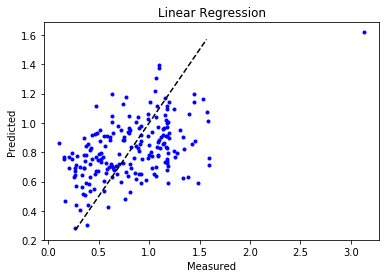

In [354]:
fig, ax = plt.subplots()

ax.plot(y,predictions, 'b.')
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set_title('Linear Regression')
plt.show()

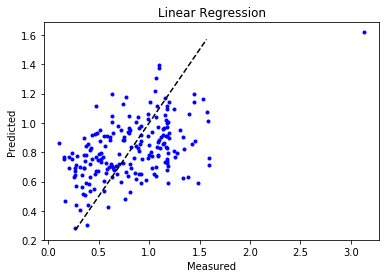

In [355]:
fig, ax = plt.subplots()

ax.plot(y,predictions, 'b.')
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set_title('Linear Regression')
plt.show()